In [2]:
import sklearn
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import collections
from itertools import chain
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.compose import make_column_selector, make_column_transformer

In [4]:
import warnings
warnings.filterwarnings('ignore')

# 0. Machine Learning Basics

Machine Learning is the study of computer algorithms that improve automatically through experience - Machine Learning, Tom Mitchell, McGraw Hill, 1997

#### Different types of machine learning:
-  Supervised Learning
    - eg. Regression, Classification
- Unsupervised Learning
    - eg. Clustering, Decision Tree
- Semi-Supervised Learning
- Reinforcement Learning

Interview Question: What's the difference between supervised and unsupervised learning?

#### A Typical Machine Learning Pipeline:
<img src="images/machine_learning_pipeline.png" />

Interview Question: What is a training/validation/test set?

# 1. Data

### 1.1 Load/Import Data

In [5]:
trades = pd.read_csv(Path("../data/raw_data/AAPL_trades.csv"))
quotes = pd.read_csv(Path("../data/raw_data/AAPL_quotes.csv"))

In [6]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283504 entries, 0 to 283503
Data columns (total 17 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Unnamed: 0                              283504 non-null  int64  
 1   Time                                    283504 non-null  object 
 2   Date                                    283504 non-null  object 
 3   Exchange                                283504 non-null  object 
 4   Symbol                                  283504 non-null  object 
 5   Trade_Volume                            283504 non-null  int64  
 6   Trade_Price                             283504 non-null  float64
 7   Sale_Condition                          283504 non-null  object 
 8   Source_of_Trade                         283504 non-null  object 
 9   Trade_Stop_Stock_Indicator              0 non-null       float64
 10  Trade_Correction_Indicator              2835

|Trades Data|Description|
|---|---|
|Unnamed: 0 | dummy index |
|Time| Time the trade was published by SIP|
|Date| Date the trade was published |
|Exchange| The ID of the exchange where the trade took place|
|Symbol| Stock Symbol|
|Trade_Volume | The number of shares traded |
|Trade_Price | The share price of this trade |
|Sale_Condition | The special condition associated with the trade|
|Source_of_Trade | CTA/UTP |
|Trade_Stop_Stock_Indicator | CTA |
|Trade_Correction_Indicator |  |
|Sequence_Number | Message sequence number |
|Trade_Id | Identifier for tracking Trades. Unique per participant per symbol per session within a trading session |
|Trade_Reporting_Facility | The ID of the Trade Reporting Facility |
|Participant_Timestamp | Time when the trade was reported|
|Trade_Reporting_Facility_TRF_Timestamp | If from an Exchange or if the FINRA ADF does not have a proprietary quotation feed, then will be set to blank. If the FINRA ADF or a FINRA TRF provides a proprietary feed of its quotation information, then it’s set to be the time of the quotation|
|Trade_Through_Exempt_Indicator | Denotes whether or not a trade is exempt from Trade Through rules |

|Quotes Data|Description|
|---|---|
|Unnamed: 0 |  |
|Time| Time the quote was published by SIP|
|Exchange|The exchange that issued the quote |
|Symbol| Stock Symbol|
|Bid_Price | The highest price any buyer is willing to pay for shares of this security |
|Bid_Size | The maximum number of shares the highest bidder is willing to buy |
|Offer_Price |The lowest price any seller is willing to take for shares of this security |
|Offer_Size | The maximum number of shares available at the offer price|
|Quote_Condition | Determines whether a quote qualifies for the Best Bid and Best Offer calculation |
|Sequence_Number | message sequence numbers|
|National_BBO_Indicator | The effect this quote has on the NBBO |
|FINRA_BBO_Indicator | Indicates the effect this quote has on the FINRA BBO |
|FINRA_ADF_MPID_Indicator | Denotes  the type of appendage to be included |
|Quote_Cancel_Correction | Indicates that this record is a cancel or a correction of a previous quote|
|Source_Of_Quote | CTA or UTP |
|Retail_Interest_Indicator | Indicates the presence of Retail Price Improvement (RPI) interest between the Bid and the Offer |
|Short_Sale_Restriction_Indicator | Short Sale Restriction status |
|LULD_BBO_Indicator |  |
|SIP_Generated_Message_Identifier | Originator of the message |
|NBBO_LULD_Indicator | LULD Limit Price Band effect on the NBB and NBO |
|Participant_Timestamp | Time the quote was published by the Participant to the SIP |
|FINRA_ADF_Timestamp | A FINRA ADF- or a FINRA TRF-provided timestamp |
|FINRA_ADF_Market_Participant_Quote_Indicator | UTP - FINRA ADF Market Participant Quote Indicator representing the Top of book quotations for each FINRA ADF participant |
|Security_Status_Indicator |  |
|Date |  |
|YearMonth|  |

Note: All column information of trades and quotes data and valid entries for each column can be found at https://www.nyse.com/publicdocs/nyse/data/Daily_TAQ_Client_Spec_v3.0.pdf

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
trades.head()

,Unnamed: 0,Time,Date,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Stop_Stock_Indicator,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator
0,0,2020-01-02 04:00:00.064010,2020-01-02,P,AAPL,3801,295.05,@ T,N,NaN,0,1185,1,,40000063617792,NaN,1
1,1,2020-01-02 04:00:02.828485,2020-01-02,P,AAPL,1,295.08,@FTI,N,NaN,0,1195,2,,40002828108800,NaN,1
2,2,2020-01-02 04:00:06.250392,2020-01-02,Q,AAPL,6,295.25,@ TI,N,NaN,0,1197,1,,40006250366823,NaN,0
3,3,2020-01-02 04:00:06.429757,2020-01-02,P,AAPL,1,295.08,@ TI,N,NaN,0,1198,3,,40006429377792,NaN,0
4,4,2020-01-02 04:00:28.894835,2020-01-02,P,AAPL,3,295.10,@ TI,N,NaN,0,1205,4,,40028894459136,NaN,0


In [9]:
quotes.head()

,Unnamed: 0,Time,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator,Date,YearMonth
0,0,2020-01-02 04:00:00.065165,P,AAPL,278.00,7.0,0.00,0.0,R,2228,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064785664,NaN,NaN,,2020-01-02,202001
1,1,2020-01-02 04:00:00.065167,P,AAPL,278.00,14.0,0.00,0.0,R,2229,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064787456,NaN,NaN,,2020-01-02,202001
2,2,2020-01-02 04:00:00.065170,P,AAPL,293.72,9.0,0.00,0.0,R,2230,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064790784,NaN,NaN,,2020-01-02,202001
3,3,2020-01-02 04:00:00.065681,P,AAPL,293.72,9.0,327.56,1.0,R,2231,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065302272,NaN,NaN,,2020-01-02,202001
4,4,2020-01-02 04:00:00.065738,P,AAPL,293.72,9.0,320.00,1.0,R,2232,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065358592,NaN,NaN,,2020-01-02,202001


### 1.2 Data Visualization & Preliminary Analysis

In [168]:
plot_data = quotes.copy()
plot_data.drop(["Unnamed: 0"], axis=1, inplace=True)
plot_data.head()

,Time,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator,Date,YearMonth
0,2020-01-02 04:00:00.065165,P,AAPL,278.00,7.0,0.00,0.0,R,2228,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064785664,NaN,NaN,,2020-01-02,202001
1,2020-01-02 04:00:00.065167,P,AAPL,278.00,14.0,0.00,0.0,R,2229,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064787456,NaN,NaN,,2020-01-02,202001
2,2020-01-02 04:00:00.065170,P,AAPL,293.72,9.0,0.00,0.0,R,2230,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064790784,NaN,NaN,,2020-01-02,202001
3,2020-01-02 04:00:00.065681,P,AAPL,293.72,9.0,327.56,1.0,R,2231,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065302272,NaN,NaN,,2020-01-02,202001
4,2020-01-02 04:00:00.065738,P,AAPL,293.72,9.0,320.00,1.0,R,2232,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065358592,NaN,NaN,,2020-01-02,202001


In [10]:
def convertParticipantTimestamp(pts, date):
        date = pd.to_datetime(date)
        pts = pd.to_datetime(
            pts.astype(str).str.zfill(15), format="%H%M%S%f")
        
        # convert datetime to index
        idx = date.apply(lambda x: x) + pts.apply(
            lambda x: timedelta(hours=x.hour, minutes=x.minute, seconds=x.second, microseconds=x.microsecond))
        
        return idx

In [170]:
converted_PTS = convertParticipantTimestamp(plot_data['Participant_Timestamp'], plot_data["Date"])

In [171]:
plot_data.set_index(converted_PTS, inplace=True)

In [172]:
plot_data.head()

,Time,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator,Date,YearMonth
2020-01-02 04:00:00.064785,2020-01-02 04:00:00.065165,P,AAPL,278.00,7.0,0.00,0.0,R,2228,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064785664,NaN,NaN,,2020-01-02,202001
2020-01-02 04:00:00.064787,2020-01-02 04:00:00.065167,P,AAPL,278.00,14.0,0.00,0.0,R,2229,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064787456,NaN,NaN,,2020-01-02,202001
2020-01-02 04:00:00.064790,2020-01-02 04:00:00.065170,P,AAPL,293.72,9.0,0.00,0.0,R,2230,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064790784,NaN,NaN,,2020-01-02,202001
2020-01-02 04:00:00.065302,2020-01-02 04:00:00.065681,P,AAPL,293.72,9.0,327.56,1.0,R,2231,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065302272,NaN,NaN,,2020-01-02,202001
2020-01-02 04:00:00.065358,2020-01-02 04:00:00.065738,P,AAPL,293.72,9.0,320.00,1.0,R,2232,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065358592,NaN,NaN,,2020-01-02,202001


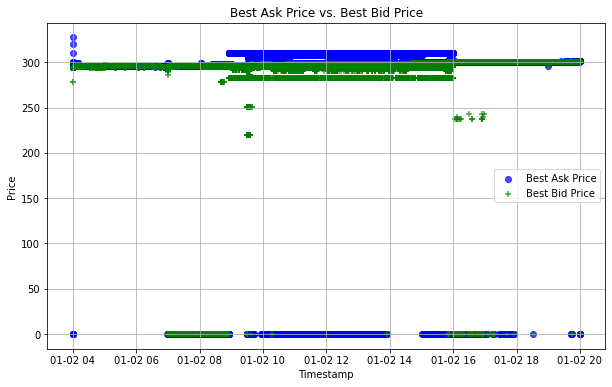

In [173]:
plt.figure(figsize=(10, 6))
plt.scatter(plot_data.index, plot_data['Offer_Price'], label='Best Ask Price', color='blue', alpha=0.7, marker='o')
plt.scatter(plot_data.index, plot_data['Bid_Price'], label='Best Bid Price', color='green', alpha=0.7, marker='+')
plt.grid(True)
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Best Ask Price vs. Best Bid Price')
plt.legend()
plt.grid(True)
plt.show()

### 1.3 Data Cleaning

Before we move towards feature generation and building machine learning models, we have to clean the dataset. The necessary steps to clean the trades and quotes data include:
1. Get rid of unnecessary columns.
2. Get rid of the invalid trades and quotes.
3. Event reconstruction.
4. Only keep the natural best bid/offer or last MQU.
5. Assign Last Active Quote and assign to the corresponding trade.

## SCIKIT-LEARN DESIGN

https://arxiv.org/pdf/1309.0238.pdf

Scikit-Learn’s API is remarkably well designed. These are the main design components of Scikit-Learn.

All objects share a consistent and simple interface:

### Estimators

Any object that can estimate some parameters based on a dataset is called an estimator (e.g., a SimpleImputer is an estimator). The estimation itself is performed by the fit() method, and it takes a dataset as a parameter, or two for supervised learning algorithms—the second dataset contains the labels. Any other parameter needed to guide the estimation process is considered a hyperparameter (such as a SimpleImputer’s strategy), and it must be set as an instance variable (generally via a constructor parameter).

### Transformers

Some estimators (such as a SimpleImputer) can also transform a dataset; these are called transformers. Once again, the API is simple: the transformation is performed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for a SimpleImputer. All transformers also have a convenience method called fit_transform(), which is equivalent to calling fit() and then transform() (but sometimes fit_transform() is optimized and runs much faster).


### Predictors

Finally, some estimators, given a dataset, are capable of making predictions; they are called predictors. For example, the LinearRegression model in the previous chapter was a predictor: given a country’s GDP per capita, it predicted life satisfaction. A predictor has a predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a score() method that measures the quality of the predictions, given a test set (and the corresponding labels, in the case of supervised learning algorithms).

### ...

Reference to the base classes for all estimators in scikit-learn can be found at: https://github.com/scikit-learn/scikit-learn/blob/9aaed4987/sklearn/base.py#L153

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from sortedcollections import OrderedSet
import time

In [18]:
class CleanData(BaseEstimator, TransformerMixin):
    
    def __init__(self, dropped_after_hourse=True, droped_irregular_hours=True):
        self.dropped_after_hourse = dropped_after_hourse
        self.droped_irregular_hours = droped_irregular_hours
        
    
    def fit(self, X, y=None):
        if 'Participant_Timestamp' and 'Date' in X.columns:
            self.part_timestamp = convertParticipantTimestamp(X['Participant_Timestamp'], X['Date'])
        else:
            self.part_timestamp = X['Participant_Timestamp']
        return self
    
    
    def transform(self, X):    
        
        # remove rows of all NA
        X = X.dropna(axis=0, how="all")
        X.drop(['Unnamed: 0','Time', 'Date', 'YearMonth'], axis=1, inplace=True, errors='ignore')
        X['Participant_Timestamp'] = self.part_timestamp
        X.index = self.part_timestamp
       
        # drop after hours if specified
        if self.dropped_after_hourse:
            after_idx = []
            for t in X.index:
                str_t = t.strftime("%H:%M:%S")
                if str_t < "09:00:00" or str_t > "16:00:00":
                    after_idx.append(t)
            X.drop(after_idx, inplace=True)
     
        
        # drop irregular hours if specified
        if self.droped_irregular_hours:
            irreg_idx = []
            for t in X.index:
                str_t = t.strftime("%H:%M:%S")
                if str_t < "09:15:00" or str_t > "15:45:00":
                    irreg_idx.append(t)
            X.drop(irreg_idx, axis=0, inplace=True)
        
        
        X = X.sort_index()
 
        return X

In [19]:
clean_pipeline = make_pipeline(
    CleanData()
)

In [20]:
clean_trades = clean_pipeline.fit_transform(trades)

In [21]:
clean_trades

,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Stop_Stock_Indicator,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator
2020-01-02 09:15:03.454000,D,AAPL,4,296.250,@ TI,N,NaN,0,16067,706,N,2020-01-02 09:15:03.454000,9.150346e+13,0
2020-01-02 09:15:06.873000,D,AAPL,1,296.250,@ TI,N,NaN,0,16087,707,N,2020-01-02 09:15:06.873000,9.150688e+13,0
2020-01-02 09:15:07.893000,D,AAPL,100,296.150,@ T,N,NaN,0,16088,708,N,2020-01-02 09:15:07.893000,9.150790e+13,0
2020-01-02 09:15:08.263000,D,AAPL,7,296.250,@ TI,N,NaN,0,16090,709,N,2020-01-02 09:15:08.263000,9.150827e+13,0
2020-01-02 09:15:08.271318,P,AAPL,1,296.150,@ TI,N,NaN,0,16091,1544,,2020-01-02 09:15:08.271318,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-02 15:44:59.735000,D,AAPL,3,299.640,@ I,N,NaN,0,2759274,63724,Q,2020-01-02 15:44:59.735000,1.544597e+14,0
2020-01-02 15:45:00.180000,D,AAPL,107,299.625,@,N,NaN,0,2759426,63725,Q,2020-01-02 15:45:00.180000,1.545002e+14,0
2020-01-02 15:45:00.180000,D,AAPL,1,299.625,@ I,N,NaN,0,2759427,63726,Q,2020-01-02 15:45:00.180000,1.545002e+14,0
2020-01-02 15:45:00.183000,D,AAPL,77,299.622,@ I,N,NaN,0,2759428,63727,Q,2020-01-02 15:45:00.183000,1.545002e+14,0


In [22]:
clean_quotes = clean_pipeline.fit_transform(quotes)
clean_quotes

,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator
2020-01-02 09:15:00.086755,X,AAPL,283.18,1.0,309.95,1.0,R,202469,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,NaN,NaN,
2020-01-02 09:15:08.271548,K,AAPL,296.06,1.0,296.33,1.0,R,202696,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,NaN,NaN,
2020-01-02 09:15:08.271574,Z,AAPL,295.37,3.0,296.82,2.0,R,202697,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,NaN,NaN,
2020-01-02 09:15:08.301537,K,AAPL,296.06,1.0,296.33,1.0,R,202699,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,NaN,NaN,
2020-01-02 09:15:08.301539,Z,AAPL,295.37,3.0,296.82,2.0,R,202698,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.301539,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-02 15:45:00.301932,N,AAPL,299.61,2.0,299.64,1.0,R,28323781,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,A,2020-01-02 15:45:00.301932,NaN,NaN,
2020-01-02 15:45:00.601576,Q,AAPL,299.61,2.0,299.63,2.0,R,28324287,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,A,2020-01-02 15:45:00.601576,NaN,NaN,
2020-01-02 15:45:00.775774,P,AAPL,299.62,2.0,299.63,1.0,R,28324664,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,A,2020-01-02 15:45:00.775774,NaN,NaN,
2020-01-02 15:45:00.776092,Z,AAPL,299.62,1.0,299.64,1.0,R,28324670,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,A,2020-01-02 15:45:00.776092,NaN,NaN,


Reconstructing Events using pandas dataframe's append() method

In [55]:
all_events = clean_trades.append(clean_quotes, ignore_index=True)

In [56]:
all_events

,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Stop_Stock_Indicator,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator
0,D,AAPL,4.0,296.25,@ TI,N,NaN,0.0,16067,706.0,N,2020-01-02 09:15:03.454000,9.150346e+13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D,AAPL,1.0,296.25,@ TI,N,NaN,0.0,16087,707.0,N,2020-01-02 09:15:06.873000,9.150688e+13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D,AAPL,100.0,296.15,@ T,N,NaN,0.0,16088,708.0,N,2020-01-02 09:15:07.893000,9.150790e+13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,AAPL,7.0,296.25,@ TI,N,NaN,0.0,16090,709.0,N,2020-01-02 09:15:08.263000,9.150827e+13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P,AAPL,1.0,296.15,@ TI,N,NaN,0.0,16091,1544.0,,2020-01-02 09:15:08.271318,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001837,N,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,28323781,NaN,NaN,2020-01-02 15:45:00.301932,NaN,NaN,299.61,2.0,299.64,1.0,R,2.0,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,A,NaN,NaN,
2001838,Q,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,28324287,NaN,NaN,2020-01-02 15:45:00.601576,NaN,NaN,299.61,2.0,299.63,2.0,R,0.0,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,A,NaN,NaN,
2001839,P,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,28324664,NaN,NaN,2020-01-02 15:45:00.775774,NaN,NaN,299.62,2.0,299.63,1.0,R,2.0,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,A,NaN,NaN,
2001840,Z,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,28324670,NaN,NaN,2020-01-02 15:45:00.776092,NaN,NaN,299.62,1.0,299.64,1.0,R,2.0,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,A,NaN,NaN,


In [25]:
len(all_events)

2001842

In [64]:
all_events = all_events.sort_values(by=['Participant_Timestamp'])

In [65]:
all_events.head(20)

,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Stop_Stock_Indicator,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator
244031,X,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,202469,NaN,NaN,2020-01-02 09:15:00.086755,NaN,NaN,283.18,1.0,309.95,1.0,R,2.0,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,NaN,
0,D,AAPL,4.0,296.25,@ TI,N,NaN,0.0,16067,706.0,N,2020-01-02 09:15:03.454000,9.150346e+13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D,AAPL,1.0,296.25,@ TI,N,NaN,0.0,16087,707.0,N,2020-01-02 09:15:06.873000,9.150688e+13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D,AAPL,100.0,296.15,@ T,N,NaN,0.0,16088,708.0,N,2020-01-02 09:15:07.893000,9.150790e+13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,AAPL,7.0,296.25,@ TI,N,NaN,0.0,16090,709.0,N,2020-01-02 09:15:08.263000,9.150827e+13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P,AAPL,1.0,296.15,@ TI,N,NaN,0.0,16091,1544.0,,2020-01-02 09:15:08.271318,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244032,K,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,202696,NaN,NaN,2020-01-02 09:15:08.271548,NaN,NaN,296.06,1.0,296.33,1.0,R,0.0,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,NaN,
244033,Z,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,202697,NaN,NaN,2020-01-02 09:15:08.271574,NaN,NaN,295.37,3.0,296.82,2.0,R,0.0,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,NaN,
5,N,AAPL,1.0,296.15,@ TI,N,NaN,0.0,16092,3.0,,2020-01-02 09:15:08.274097,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244034,K,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,202699,NaN,NaN,2020-01-02 09:15:08.301537,NaN,NaN,296.06,1.0,296.33,1.0,R,0.0,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,NaN,


In [66]:
def generate_mox_identifier(participant_timestamps):
        """Generate MOX Identifier
        """
        # convert timestamps to float
        fl_participant_timestamps = [float(ts.timestamp()*1000) for ts in participant_timestamps]
        # generate unique index for each timestamp
        time_mox_mapping = {ts: mox_idx for mox_idx, ts in enumerate(OrderedSet(fl_participant_timestamps))}
        # generate the mox_identifiers
        mox_identifiers = [time_mox_mapping[t] for t in fl_participant_timestamps]

        return mox_identifiers

Reference: All cleaning steps including the MOX Identifier are implemented based on the papaer: The Participant Timestamp: Get The Most Out Of TAQ Data https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3984827 

In [67]:
class PreprocessData(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        return
        
    
    def fit(self, X, y=None):
        self.invalid_idx = []
        
        # invalid trades
        self.invalid_idx.extend(X[X['Trade_Price'] < 0].index) 
        self.invalid_idx.extend(X[X['Trade_Volume'] < 0].index)
        self.invalid_idx.extend(X[X['Trade_Reporting_Facility'] == 'D'].index)
        
        # invalid quotes
        self.invalid_idx.extend(X[X['Bid_Price'] < 0].index)
        self.invalid_idx.extend(X[X['Offer_Price'] < X['Bid_Price']].index)
        return self
    
    
    def transform(self, X):    
        
        #drop invalid trades and quotes
        X.drop(self.invalid_idx, inplace=True)
        
        #assign mox identifier
        X['MOX'] = generate_mox_identifier(X['Participant_Timestamp'])
        
        return X

In [68]:
preprocess_pipeline = make_pipeline(
    PreprocessData()
)

In [69]:
df_prepared = preprocess_pipeline.fit_transform(all_events)

In [71]:
df_prepared.head(20)

,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Stop_Stock_Indicator,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator,MOX
244031,X,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,202469,NaN,NaN,2020-01-02 09:15:00.086755,NaN,NaN,283.18,1.0,309.95,1.0,R,2.0,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,NaN,,0
0,D,AAPL,4.0,296.25,@ TI,N,NaN,0.0,16067,706.0,N,2020-01-02 09:15:03.454000,9.150346e+13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,D,AAPL,1.0,296.25,@ TI,N,NaN,0.0,16087,707.0,N,2020-01-02 09:15:06.873000,9.150688e+13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,D,AAPL,100.0,296.15,@ T,N,NaN,0.0,16088,708.0,N,2020-01-02 09:15:07.893000,9.150790e+13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,D,AAPL,7.0,296.25,@ TI,N,NaN,0.0,16090,709.0,N,2020-01-02 09:15:08.263000,9.150827e+13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,P,AAPL,1.0,296.15,@ TI,N,NaN,0.0,16091,1544.0,,2020-01-02 09:15:08.271318,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
244032,K,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,202696,NaN,NaN,2020-01-02 09:15:08.271548,NaN,NaN,296.06,1.0,296.33,1.0,R,0.0,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,NaN,,6
244033,Z,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,202697,NaN,NaN,2020-01-02 09:15:08.271574,NaN,NaN,295.37,3.0,296.82,2.0,R,0.0,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,NaN,,7
5,N,AAPL,1.0,296.15,@ TI,N,NaN,0.0,16092,3.0,,2020-01-02 09:15:08.274097,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
244034,K,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,202699,NaN,NaN,2020-01-02 09:15:08.301537,NaN,NaN,296.06,1.0,296.33,1.0,R,0.0,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,NaN,,9


In [37]:
df_prepared[df_prepared['MOX'] == 10]

,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Stop_Stock_Indicator,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator,MOX
13,Q,AAPL,34.0,296.11,@FTI,N,NaN,0.0,16113,1445.0,,2020-01-02 09:15:14.393854,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
14,Q,AAPL,41.0,296.11,@FTI,N,NaN,0.0,16114,1446.0,,2020-01-02 09:15:14.393854,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
244070,Q,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,202813,NaN,NaN,2020-01-02 09:15:14.393854,NaN,NaN,296.1,27.0,296.25,1.0,R,4.0,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,NaN,,10


Visualize the pipeline

In [54]:
# import the set_config module from sklearn
from sklearn import set_config

# set the display option for sklearn to 'diagram'
set_config(display='diagram')

# display the pipeline 
preprocess_pipeline


Pipeline(steps=[('preprocessdata', PreprocessData())])

## 2. Feature Generation

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer

In [20]:
import sys
sys.path.insert(1, '../feature_generation')

In [21]:
from generators import parent_generator

In [22]:
raw_trade_features, raw_quote_features = df_clean.columns.values[:14], df_clean.columns.values[14:]
raw_trade_features

array(['Date', 'Exchange', 'Symbol', 'Trade_Volume', 'Trade_Price',
       'Sale_Condition', 'Source_of_Trade', 'Trade_Correction_Indicator',
       'Sequence_Number', 'Trade_Id', 'Trade_Reporting_Facility',
       'Participant_Timestamp', 'Trade_Reporting_Facility_TRF_Timestamp',
       'Trade_Through_Exempt_Indicator'], dtype=object)

In [23]:
raw_quote_features

array(['Bid_Price', 'Bid_Size', 'Offer_Price', 'Offer_Size',
       'Quote_Condition', 'National_BBO_Indicator', 'Source_Of_Quote',
       'Retail_Interest_Indicator', 'Short_Sale_Restriction_Indicator',
       'SIP_Generated_Message_Identifier', 'NBBO_LULD_Indicator',
       'Security_Status_Indicator', 'YearMonth', 'MOX_Identifiers'],
      dtype=object)

### 2.1 Some Features to Consider

#### References: 
-  How and When are High-Frequency Stock Returns Predictable?
https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4095405

#### Features for Trades Data:
-  Trade Side (Tick Test)

#### Features for Quotes Data:
-  $\small\text{Effective Spread} = \text{Offer Price} - \text{Bid Price}$
-  $\small\text{Mid Price} = \large\frac{\text{(Offer Price + Bid Price)}}{2}$
-  $ \text{Microprice} = \large\frac{\text{Offer Price} \times \text{Offer Size} + \text{Bid Price} \times \text{Bid Size}}{\text{Offer Size} + \text{Bid Size}}$
-  $ \text{Imbalance} = \large\frac{\text{Bid Size}}{\text{Offer Size}} $

In [24]:
trade_features_to_generate = ["Trade_Side"]
# quote_features_to_generate = []
quote_features_to_generate = ["Effective_Spread", "Midprice", "Microprice", "Imbalance"]

In [25]:
class GenerateTradeFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self, features):
        self.features = features
        return
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        trade_features = X.columns
        for f in self.features:
            if f not in trade_features:
                X, _ = parent_generator(X, f)            
        return X
        

In [26]:
class GenerateQuoteFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self, features):
        self.features = features
        return
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        quote_features = X.columns
        for f in self.features:
            if f not in quote_features:
                X, _ = parent_generator(X, f)
        return X


In [27]:
trade_pipeline = make_pipeline(GenerateTradeFeatures(trade_features_to_generate))
quote_pipeline = make_pipeline(GenerateQuoteFeatures(quote_features_to_generate))

In [28]:
generating_features = make_column_transformer(
    (trade_pipeline, raw_trade_features),
    (quote_pipeline, raw_quote_features)
)

In [29]:
df_copy = df_clean.copy()

In [30]:
data_prepared = generating_features.fit_transform(df_copy)

In [36]:

set_config(display='diagram')

# display the pipeline 'num_pipeline'
generating_features


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('generatetradefeatures',
                                                  GenerateTradeFeatures(features=['Trade_Side']))]),
                                 array(['Date', 'Exchange', 'Symbol', 'Trade_Volume', 'Trade_Price',
       'Sale_Condition', 'Source_of_Trade', 'Trade_Correction_Indicator',
       'Sequence_Number', 'Trade_Id', 'Trade_Reporting_Facility',
       'Participant_Timestamp', 'Trade...
                                                                                  'Midprice',
                                                                                  'Microprice',
                                                                                  'Imbalance']))]),
                                 array(['Bid_Price', 'Bid_Size', 'Offer_Price', 'Offer_Size',
       'Quote_Condition', 'National_BBO_Indicator', 'Source_Of_Quote',
       'Retail_Interest_Indicator', 'Short_Sale_Restriction_Indicator',
       'SIP_Generated_Message_Identifier', 'NBBO_LULD_Indicator',
       'Security_Status_Indicator', 'YearMonth', 'MOX_Identifiers'],
      dtype=object))])

In [31]:
column_names = np.concatenate((raw_trade_features, trade_features_to_generate, \
                             raw_quote_features, quote_features_to_generate), axis=0)

In [32]:
data_prepared_fr = pd.DataFrame(
    data_prepared,
    # The columns parameter specifies the column names for the DataFrame 
    # and is set to the output of preprocessing.get_feature_names_out().
    columns=column_names,
    # The index parameter sets the index of the DataFrame to the index of the housing data, 
    # preserving the original data's indices.
    index=df_copy.index)
# This line displays the first two rows of the created DataFrame using the head() method.

In [33]:
data_prepared_fr.head(20)

,Date,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator,Trade_Side,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,National_BBO_Indicator,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Security_Status_Indicator,YearMonth,MOX_Identifiers,Effective_Spread,Midprice,Microprice,Imbalance
2020-01-02 09:45:00.001258,2020-01-02,N,AAPL,NaN,NaN,NaN,NaN,NaN,2025557,NaN,NaN,2020-01-02 09:45:00.001258,NaN,NaN,NaN,297.11,1.0,297.15,1.0,R,2.0,N,NaN,0.0,NaN,A,,202001.0,0,0.04,297.13,297.13,1.0
2020-01-02 09:45:00.001451,2020-01-02,N,AAPL,NaN,NaN,NaN,NaN,NaN,2025564,NaN,NaN,2020-01-02 09:45:00.001451,NaN,NaN,NaN,297.11,1.0,297.2,1.0,R,0.0,N,NaN,0.0,NaN,A,,202001.0,1,0.09,297.155,297.155,1.0
2020-01-02 09:45:00.001459,2020-01-02,N,AAPL,NaN,NaN,NaN,NaN,NaN,2025565,NaN,NaN,2020-01-02 09:45:00.001459,NaN,NaN,NaN,297.11,2.0,297.2,1.0,R,2.0,N,NaN,0.0,NaN,A,,202001.0,2,0.09,297.155,297.14,2.0
2020-01-02 09:45:00.001518,2020-01-02,N,AAPL,NaN,NaN,NaN,NaN,NaN,2025566,NaN,NaN,2020-01-02 09:45:00.001518,NaN,NaN,NaN,297.11,2.0,297.28,1.0,R,0.0,N,NaN,0.0,NaN,A,,202001.0,3,0.17,297.195,297.166667,2.0
2020-01-02 09:45:00.001538,2020-01-02,N,AAPL,NaN,NaN,NaN,NaN,NaN,2025567,NaN,NaN,2020-01-02 09:45:00.001538,NaN,NaN,NaN,297.11,3.0,297.28,1.0,R,2.0,N,NaN,0.0,NaN,A,,202001.0,4,0.17,297.195,297.1525,3.0
2020-01-02 09:45:00.012368,2020-01-02,Z,AAPL,NaN,NaN,NaN,NaN,NaN,2026234,NaN,NaN,2020-01-02 09:45:00.012368,NaN,NaN,NaN,297.08,2.0,297.13,2.0,R,2.0,N,NaN,0.0,NaN,A,,202001.0,5,0.05,297.105,297.105,1.0
2020-01-02 09:45:00.012486,2020-01-02,N,AAPL,NaN,NaN,NaN,NaN,NaN,2026243,NaN,NaN,2020-01-02 09:45:00.012486,NaN,NaN,NaN,297.11,2.0,297.28,1.0,R,2.0,N,NaN,0.0,NaN,A,,202001.0,6,0.17,297.195,297.166667,2.0
2020-01-02 09:45:00.038245,2020-01-02,K,AAPL,NaN,NaN,NaN,NaN,NaN,2026679,NaN,NaN,2020-01-02 09:45:00.038245,NaN,NaN,NaN,297.04,1.0,297.13,1.0,R,0.0,N,NaN,0.0,NaN,A,,202001.0,7,0.09,297.085,297.085,1.0
2020-01-02 09:45:00.079739,2020-01-02,K,AAPL,NaN,NaN,NaN,NaN,NaN,2027059,NaN,NaN,2020-01-02 09:45:00.079739,NaN,NaN,NaN,297.04,1.0,297.13,2.0,R,0.0,N,NaN,0.0,NaN,A,,202001.0,8,0.09,297.085,297.1,0.5
2020-01-02 09:45:00.117069,2020-01-02,Q,AAPL,NaN,NaN,NaN,NaN,NaN,2027420,NaN,NaN,2020-01-02 09:45:00.117069,NaN,NaN,NaN,297.11,1.0,297.13,2.0,R,2.0,N,NaN,0.0,NaN,A,,202001.0,9,0.02,297.12,297.123333,0.5
